Скачиваем библиотеки

In [1]:
!pip install lxml
!pip install lightgbm
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install phik
!pip install random
!pip install -U scikit-learn
!pip install tensorflow


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


импортируем библиотеки

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as mp
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler

from phik.report import plot_correlation_matrix
# from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from random import randint
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier


In [3]:
data = pd.read_csv('data.csv')

In [4]:
data

,№п/п,№документа,дата регистрации,исходный номер и дата,Адресат,Автор,Краткое содежание,Примечание
0,11,WSR/1.4-828/2019,08.04.2019,140-р 08.04.2019,Крайчинская С.Б.,"Ажгиревич А.И. (ОООР ""Союз Машиностроителей Ро...",Вх - Об участии в заочном заседании Совета по ...,"Повестка заседания, а также материалы к нему, ..."
1,22,WSR/1-817/2019,08.04.2019,б/н 05.04.2019,Уразов Р.Н.,Без автора (Управление Президента Российской Ф...,Вх - Об участии в заседании рабочей группы по ...,поступило с эл. адреса prm_Bilenkina@gov.ru в ...
2,26,WSR/1-813/2019,08.04.2019,ИП-398/05 05.04.2019,Уразов Р.Н.,Потехина И.П. (Министерство просвещения Россий...,Вх - О предоставлении документов для заключени...,"срок до 6 апреля, письмо прислали 5 апр в 19:4..."
3,114,WSR/1-724/2019,01.04.2019,Д10/4932-ис 07.03.2019,Уразов Р.Н.,Пашков К.А. (Министерство транспорта Российско...,Вх - Об участии в совещании по вопросу достиже...,письмо получено 01.04.2019 - (Почта России)
4,116,WSR/1-722/2019,01.04.2019,3365 25.03.2019,Глушко Д.Е.,"Томских А.А. (Министерство образования, науки ...",Вх - О направлении дорожной карты внедрения ре...,для передачи Уфимцеву/Дмитриеву
...,...,...,...,...,...,...,...,...
303,4936,WSR/1.-1775/2017,03.11.2017,107/10 27.10.2017,Уразов Р.Н.,"Климов Е.С. (ООО ""Эттон-Центр"")",Возражения на Отзыв Союза на Исковое завление,"Без приложений, т.к. письмо направлено в Арбит..."
304,4937,WSR/1.-1774/2017,07.11.2017,2040/01/2 17.10.2017,Уразов Р.Н.,Равич К. (Министерство промышленной политики Р...,О приглашении на IV Чемпионат WorldSkills Hi-T...,Направлено Мироновой С.
305,4952,WSR/1.-1761/2017,02.11.2017,03-15-1514/17-0-2 20.10.2017,Уразов Р.Н.,Соляников Ю.В. (Комитет по образованию Правите...,Об участии в мероприятиях IV Чемпионата WorldS...,Направлено Мироновой С.
306,4953,WSR/1.-1758/2017,02.11.2017,4598/01-021-17 01.11.2017,Уразов Р.Н.,Зубов Д.Ю. (Министерство образования и науки К...,Об участии в IV Национальном чемпионате сквозн...,Направлено Глушко Д.Е.


Делаем перекодировку

In [5]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(data) # Теперь encoded data содержит закодированные кат. признаки
encoded_data.head()

,№п/п,№документа,дата регистрации,исходный номер и дата,Адресат,Автор,Краткое содежание,Примечание
0,11,268,37,104,16,4,186,138
1,22,213,37,276,38,22,199,216
2,26,212,37,247,38,164,120,239
3,114,204,1,236,38,156,205,212
4,116,202,1,165,3,200,59,198


Смотрим на значения

In [6]:
encoded_data.describe()

,№п/п,№документа,дата регистрации,исходный номер и дата,Адресат,Автор,Краткое содежание,Примечание
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,2677.915584,153.500000,83.879870,152.246753,21.909091,125.100649,140.327922,127.107143
std,1570.915474,89.056162,49.847538,88.550493,14.445613,73.522756,80.657475,71.874426
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1121.500000,76.750000,40.000000,75.750000,3.000000,57.000000,70.000000,70.750000
50%,2843.500000,153.500000,84.500000,152.500000,21.000000,125.500000,140.500000,118.000000
75%,4210.250000,230.250000,128.250000,229.250000,38.000000,191.000000,216.250000,193.250000
max,4961.000000,307.000000,167.000000,303.000000,38.000000,248.000000,273.000000,244.000000


# Классификация

1.Обоснование выбора модели:

Support Vector Machine (SVM): SVM хорошо работает для задач классификации, особенно в случае, когда данные не очень объемные, и есть ярко выраженные разделители между классами. SVM также позволяет легко справляться с нелинейными зависимостями с помощью ядерных функций.

Pipeline с StandardScaler: StandardScaler используется для стандартизации данных, что особенно важно для методов, таких как SVM, которые чувствительны к масштабу признаков.

Простота и эффективность: SVM - относительно простой и эффективный метод классификации, особенно когда у вас есть небольшой объем данных.

Задаем в переменные x и у свои данные

In [7]:
X = encoded_data.drop('Адресат', axis=1)
y = encoded_data['Адресат']

Разделим данные на тренировочный и тестовый наборы

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Создадим pipeline с StandardScaler и SVM

In [9]:
model = make_pipeline(StandardScaler(), SVC())

Обучим модель на тренировочных данных

In [10]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Предскажем метки классов для тестового набора

In [11]:
y_pred = model.predict(X_test)

Оценим точность модели

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')
classification_rep = classification_report(y_test, y_pred)
print('Отчет по классификации:\n', classification_rep)

Точность модели: 0.5161290322580645
Отчет по классификации:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.41      0.53      0.46        17
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       1.00      0.17      0.29         6
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         1
          38       0.56      0.92      0.70        24

    accuracy       

c:\Users\tooer\lwjgl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tooer\lwjgl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tooer\lwjgl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.Обоснование выбора модели:

Random Forest (Случайный лес): Эта модель хорошо обрабатывает разнообразные типы данных, автоматически обрабатывает пропущенные значения, устойчива к переобучению и не требует масштабирования признаков. Также, она способна работать с большим количеством признаков, что может быть важным при анализе данных о дорожных ситуациях.

Задаем в переменные x и у свои данные

In [14]:
X = encoded_data.drop('Адресат', axis=1)
y = encoded_data['Адресат']

Разделим данные на тренировочный и тестовый наборы

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Инициализация и обучение модели

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Предскажем метки классов для тестового набора

In [17]:
y_pred = model.predict(X_test)

Оценим точность модели

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.6612903225806451


3.Метод k-ближайших соседей (k-NN) выбирается в различных сценариях из-за своей простоты и интуитивной идеи

Задаем в переменные x и у свои данные

In [8]:
X = encoded_data.drop('Адресат', axis=1)
y = encoded_data['Адресат']

Разделяем данные на обучающие и тестовые наборы

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Создание и обучение модели k-NN

In [10]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Предсказание классов для тестового набора данных

In [11]:
y_pred = knn_classifier.predict(X_test)

Оценка точности модел

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.41935483870967744


Лучшей моделью оказалась RandomForest

# Визуализация зависимостей данных

Визуализируем зависимость данных

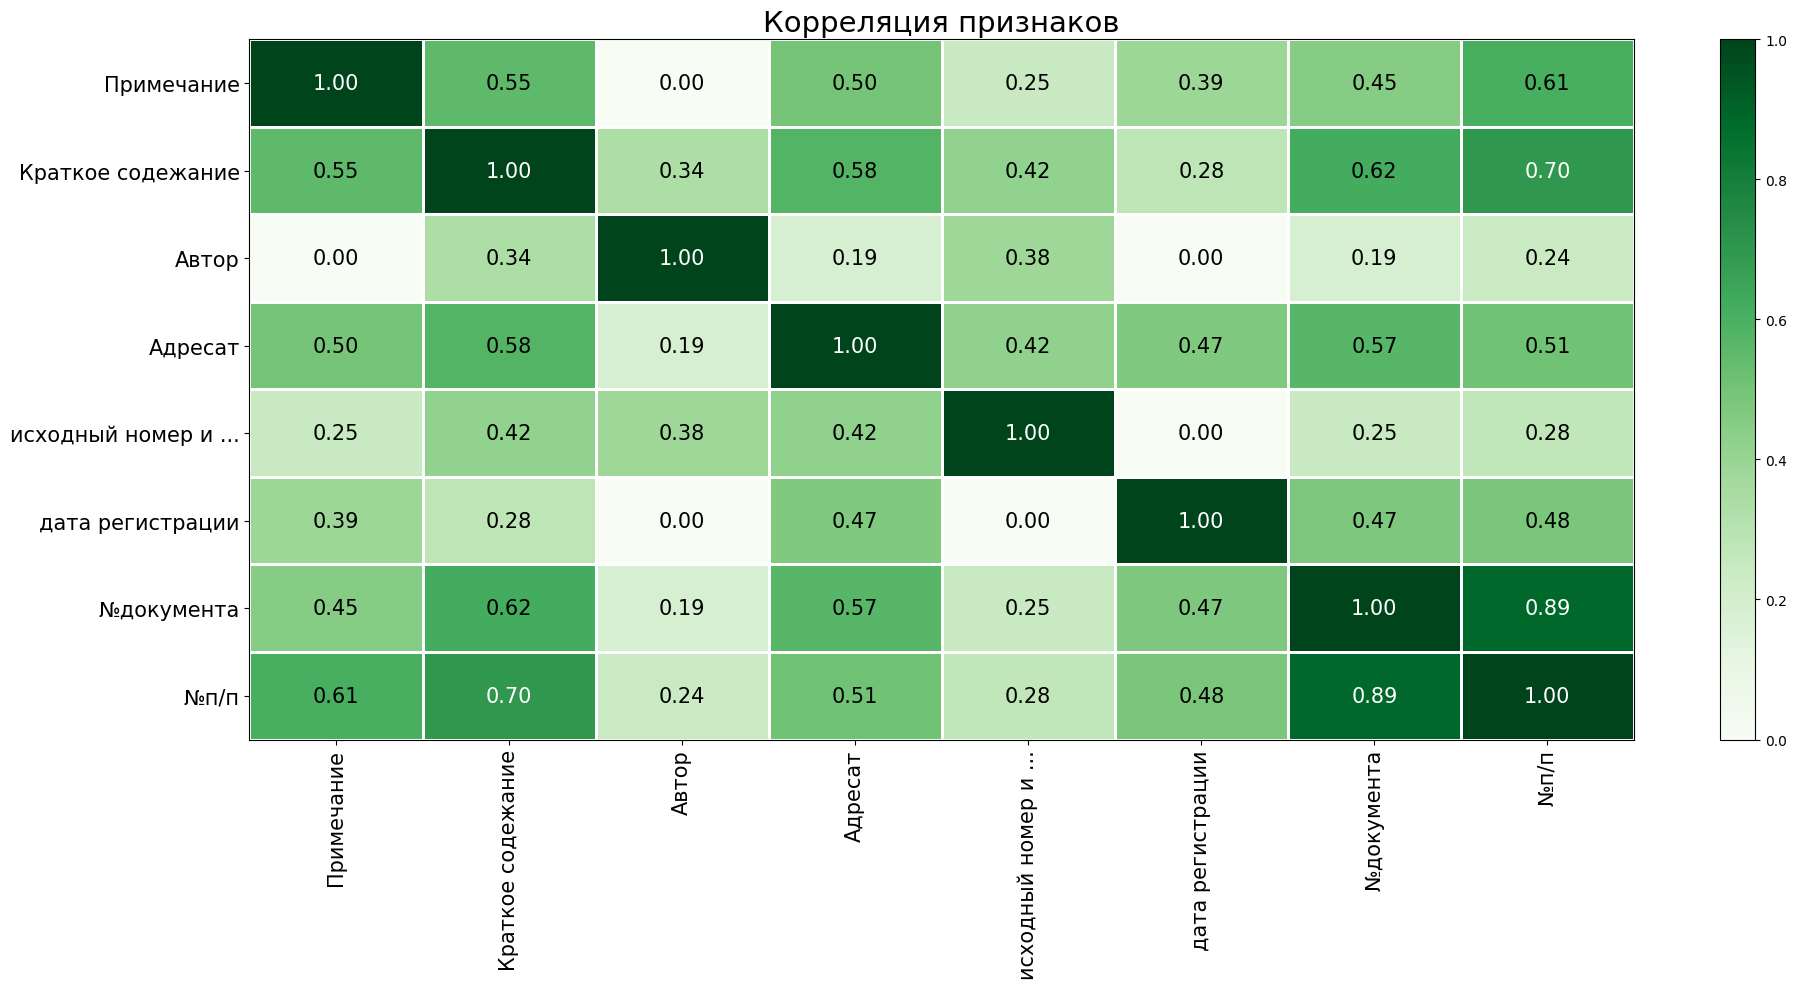

In [7]:
features_target = encoded_data
interval_cols = encoded_data
phik_overview = features_target.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title="Корреляция признаков",
                        fontsize_factor=1.5,
                        figsize=(20, 10))
plt.tight_layout()

Посмотрим как адресат относиться к Примечанию

<Axes: xlabel='Адресат', ylabel='Примечание'>

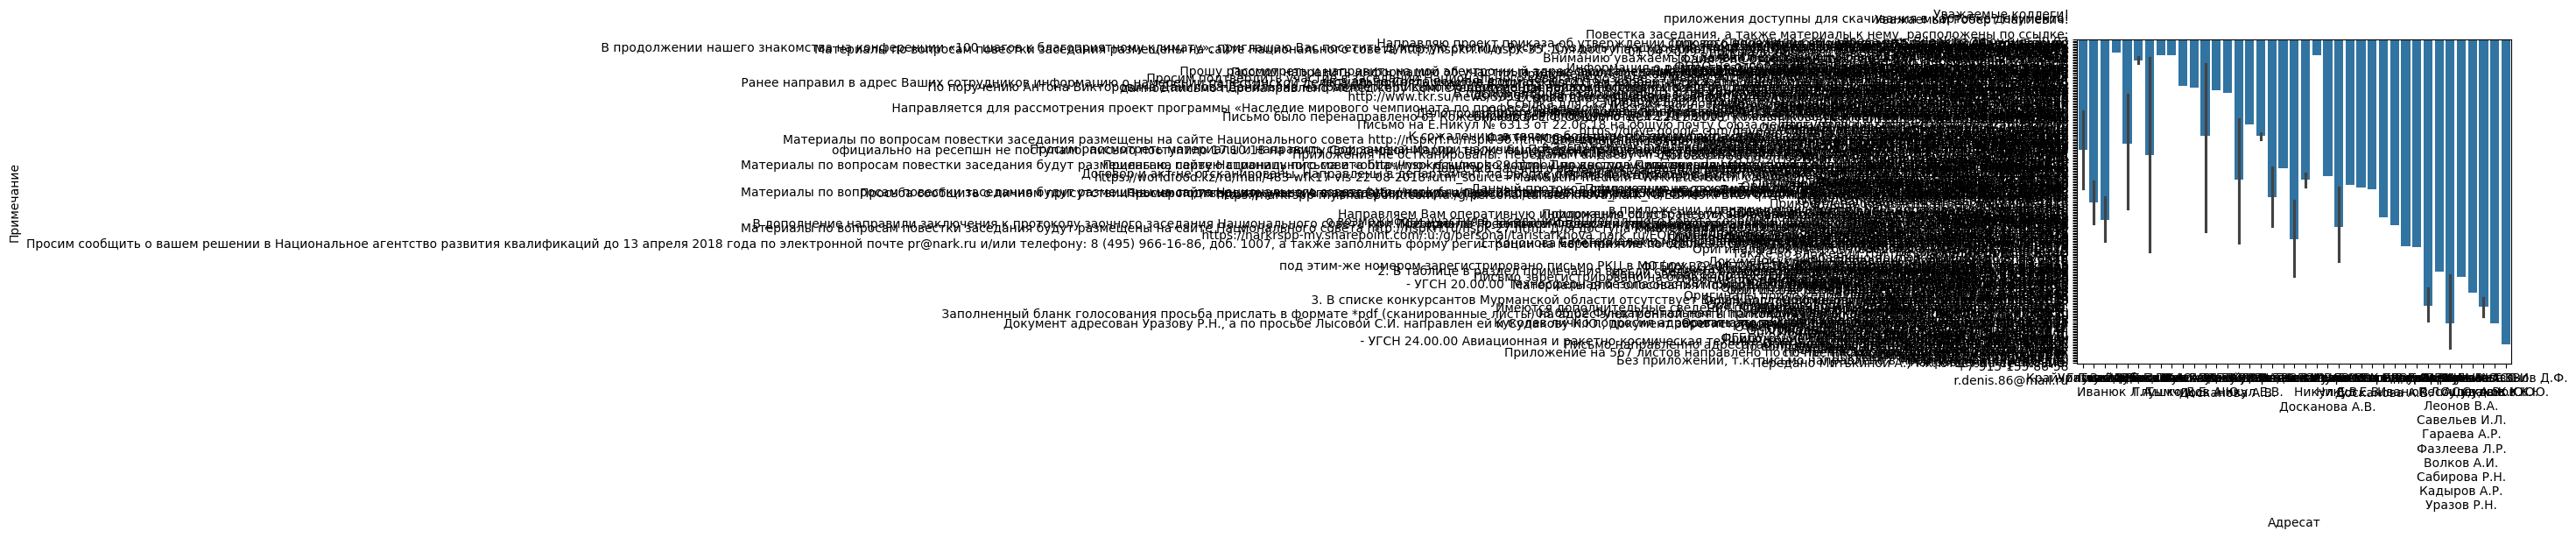

In [11]:
sns.barplot(x='Адресат', y='Примечание', data=data)

# Выводы

В результате этой сесси было сделано:  Классификация документов и Визуализация зависимостей данных.
Обоснование выбора модели классификации: 
Random Forest (Случайный лес): Эта модель хорошо обрабатывает разнообразные типы данных, автоматически обрабатывает пропущенные значения, устойчива к переобучению и не требует масштабирования признаков. Также, она способна работать с большим количеством признаков, что может быть важным при анализе данных о дорожных ситуациях.

Support Vector Machine (SVM): SVM хорошо работает для задач классификации, особенно в случае, когда данные не очень объемные, и есть ярко выраженные разделители между классами. SVM также позволяет легко справляться с нелинейными зависимостями с помощью ядерных функций.

Pipeline с StandardScaler: StandardScaler используется для стандартизации данных, что особенно важно для методов, таких как SVM, которые чувствительны к масштабу признаков.

Простота и эффективность: SVM - относительно простой и эффективный метод классификации, особенно когда у вас есть небольшой объем данных.
Выбор способов визуализации:
Визуализация корреляции признаков хорошо показывает зависимость данных
Результаты визуализации: Я увидел что Адресат коррелирует с Кратким содержанием и т.д
Обоснование способа разделения на обучающую и тестирующую выборки: Удобство